# Make Neut Curves and Analyze Mouse Neuts

In [1]:
import math

import pandas as pd
import numpy as np
import seaborn as sns

import neutcurve

from plotnine import *

import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties

import scipy.stats

In [2]:
CBP = neutcurve.colorschemes.CBPALETTE
CBM = neutcurve.colorschemes.CBMARKERS
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))

In [3]:
fidf_rnd1 = pd.read_csv('./fract_infect/201015_fractinfect.csv').drop(['Unnamed: 0'], axis=1)
fidf_rnd2 = pd.read_csv('./fract_infect/201016_fractinfect_rnd2.csv').drop(['Unnamed: 0'], axis=1)
fidf_rnd3 = pd.read_csv('./fract_infect/201017_fractinfect_rnd3.csv').drop(['Unnamed: 0'], axis=1)
fidf_rnd4 = pd.read_csv('./fract_infect/201020_fractinfect_rnd4.csv').drop(['Unnamed: 0'], axis=1)

In [4]:
display(fidf_rnd1.head())
display(fidf_rnd2.head())
display(fidf_rnd3.head())
display(fidf_rnd4.head())

,serum,virus,replicate,concentration,fraction infectivity
0,0840-1,S-d21-D614G,1,0.050000,0.988406
1,0840-1,S-d21-D614G,1,0.016667,0.999059
2,0840-1,S-d21-D614G,1,0.005556,1.013738
3,0840-1,S-d21-D614G,1,0.001852,0.909787
4,0840-1,S-d21-D614G,1,0.000617,0.900076


,serum,virus,replicate,concentration,fraction infectivity
0,0805-1,S-d21-D614G,1,0.050000,0.625716
1,0805-1,S-d21-D614G,1,0.016667,0.710727
2,0805-1,S-d21-D614G,1,0.005556,0.761430
3,0805-1,S-d21-D614G,1,0.001852,1.159994
4,0805-1,S-d21-D614G,1,0.000617,0.713713


,serum,virus,replicate,concentration,fraction infectivity
0,GF-8,S-d21-D614G,1,0.050000,0.565430
1,GF-8,S-d21-D614G,1,0.016667,0.639826
2,GF-8,S-d21-D614G,1,0.005556,0.635820
3,GF-8,S-d21-D614G,1,0.001852,0.862117
4,GF-8,S-d21-D614G,1,0.000617,0.814357


,serum,virus,replicate,concentration,fraction infectivity
0,0840-2,S-d21-D614G,1,0.016667,-0.002234
1,0840-2,S-d21-D614G,1,0.005556,-0.002000
2,0840-2,S-d21-D614G,1,0.001852,-0.000372
3,0840-2,S-d21-D614G,1,0.000617,0.021737
4,0840-2,S-d21-D614G,1,0.000206,0.135276


In [5]:
smpls_rnd1 = pd.read_csv('./sample_maps/rnd1_sample_map.csv').rename(columns={'Sample': 'serum'})
smpls_rnd2 = pd.read_csv('./sample_maps/rnd2_sample_map.csv').rename(columns={'Sample': 'serum'})
smpls_rnd3 = pd.read_csv('./sample_maps/rnd3_sample_map.csv').rename(columns={'Sample': 'serum'})
smpls_rnd4 = pd.read_csv('./sample_maps/rnd4_sample_map.csv').rename(columns={'Sample': 'serum'})

In [6]:
display(smpls_rnd1.head())
display(smpls_rnd2.head())
display(smpls_rnd3.head())
display(smpls_rnd4.head())

,DateSetUp,serum,Plate,SampleNum,Virus,PlateLayout,StartDil,DilFactor
0,201013,0793-1,Plate1,1,S-d21-D614G,layout1.csv,0.05,3
1,201013,0846-1,Plate1,2,S-d21-D614G,layout1.csv,0.05,3
2,201013,0807-1,Plate1,3,S-d21-D614G,layout1.csv,0.05,3
3,201013,0813-1,Plate1,4,S-d21-D614G,layout1.csv,0.05,3
4,201013,0863-1,Plate2,1,S-d21-D614G,layout1.csv,0.05,3


,DateSetUp,serum,Plate,SampleNum,Virus,PlateLayout,StartDil,DilFactor
0,201014,0805-1,Plate1,1,S-d21-D614G,layout1.csv,0.05,3
1,201014,0854-1,Plate1,2,S-d21-D614G,layout1.csv,0.05,3
2,201014,0858-1,Plate1,3,S-d21-D614G,layout1.csv,0.05,3
3,201014,0817-1,Plate1,4,S-d21-D614G,layout1.csv,0.05,3
4,201014,0834-1,Plate2,1,S-d21-D614G,layout1.csv,0.05,3


,DateSetUp,serum,Plate,SampleNum,Virus,PlateLayout,StartDil,DilFactor
0,201015,0839-2,Plate1,1,S-d21-D614G,layout2.csv,0.05,3
1,201015,0846-2,Plate1,2,S-d21-D614G,layout2.csv,0.05,3
2,201015,0852-2,Plate2,1,S-d21-D614G,layout2.csv,0.05,3
3,201015,0859-2,Plate2,2,S-d21-D614G,layout2.csv,0.05,3
4,201015,0863-2,Plate3,1,S-d21-D614G,layout2.csv,0.05,3


,DateSetUp,serum,Plate,SampleNum,Virus,PlateLayout,StartDil,DilFactor
0,201018,0840-2,Plate1,1,S-d21-D614G,layout2.csv,0.016667,3
1,201018,0850-2,Plate1,2,S-d21-D614G,layout2.csv,0.016667,3
2,201018,0853-2,Plate2,1,S-d21-D614G,layout2.csv,0.016667,3
3,201018,0856-2,Plate2,2,S-d21-D614G,layout2.csv,0.016667,3
4,201018,0864-2,Plate3,1,S-d21-D614G,layout2.csv,0.016667,3


#### Add plate number to fraction infectivity df

In [7]:
df_rnd1 = fidf_rnd1.merge(smpls_rnd1, how='outer', on='serum').drop(['Virus', 'PlateLayout', 'StartDil', 'DilFactor'], axis=1)
display(df_rnd1.head())

,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
0,0840-1,S-d21-D614G,1,0.050000,0.988406,201013,Plate7,1
1,0840-1,S-d21-D614G,1,0.016667,0.999059,201013,Plate7,1
2,0840-1,S-d21-D614G,1,0.005556,1.013738,201013,Plate7,1
3,0840-1,S-d21-D614G,1,0.001852,0.909787,201013,Plate7,1
4,0840-1,S-d21-D614G,1,0.000617,0.900076,201013,Plate7,1


In [8]:
df_rnd2 = fidf_rnd2.merge(smpls_rnd2, how='outer', on='serum').drop(['Virus', 'PlateLayout', 'StartDil', 'DilFactor'], axis=1)
display(df_rnd2.head())

,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
0,0805-1,S-d21-D614G,1,0.050000,0.625716,201014,Plate1,1
1,0805-1,S-d21-D614G,1,0.016667,0.710727,201014,Plate1,1
2,0805-1,S-d21-D614G,1,0.005556,0.761430,201014,Plate1,1
3,0805-1,S-d21-D614G,1,0.001852,1.159994,201014,Plate1,1
4,0805-1,S-d21-D614G,1,0.000617,0.713713,201014,Plate1,1


In [9]:
df_rnd3 = fidf_rnd3.merge(smpls_rnd3, how='outer', on='serum').drop(['Virus', 'PlateLayout', 'StartDil', 'DilFactor'], axis=1)
display(df_rnd3.head())

,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
0,GF-8,S-d21-D614G,1,0.050000,0.565430,201015,Plate9,1
1,GF-8,S-d21-D614G,1,0.016667,0.639826,201015,Plate9,1
2,GF-8,S-d21-D614G,1,0.005556,0.635820,201015,Plate9,1
3,GF-8,S-d21-D614G,1,0.001852,0.862117,201015,Plate9,1
4,GF-8,S-d21-D614G,1,0.000617,0.814357,201015,Plate9,1


In [10]:
df_rnd4 = fidf_rnd4.merge(smpls_rnd4, how='outer', on='serum').drop(['Virus', 'PlateLayout', 'StartDil', 'DilFactor'], axis=1)
display(df_rnd4.head())

,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
0,0840-2,S-d21-D614G,1,0.016667,-0.002234,201018,Plate1,1
1,0840-2,S-d21-D614G,1,0.005556,-0.002000,201018,Plate1,1
2,0840-2,S-d21-D614G,1,0.001852,-0.000372,201018,Plate1,1
3,0840-2,S-d21-D614G,1,0.000617,0.021737,201018,Plate1,1
4,0840-2,S-d21-D614G,1,0.000206,0.135276,201018,Plate1,1


### Fix Plate 4 Issue for Rnd1

I forgot to discard the last 30 uL from the serum dilutions in row H of plate 4, so I need to drop the final dilution for all plate 

In [11]:
df_rnd1.drop(df_rnd1[(df_rnd1['Plate']=='Plate4')&(df_rnd1['concentration']==(0.05/(3**6)))].index, axis=0, inplace=True)
df_rnd1 = df_rnd1.sort_values(['Plate', 'SampleNum', 'replicate'])
display(df_rnd1)

,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
336,0793-1,S-d21-D614G,1,0.050000,0.245596,201013,Plate1,1
337,0793-1,S-d21-D614G,1,0.016667,0.396659,201013,Plate1,1
338,0793-1,S-d21-D614G,1,0.005556,0.479400,201013,Plate1,1
339,0793-1,S-d21-D614G,1,0.001852,0.822955,201013,Plate1,1
340,0793-1,S-d21-D614G,1,0.000617,1.009480,201013,Plate1,1
...,...,...,...,...,...,...,...,...
51,20/130 Ref,S-d21-D614G,2,0.002778,0.067901,201013,Plate7,5
52,20/130 Ref,S-d21-D614G,2,0.000926,0.184104,201013,Plate7,5
53,20/130 Ref,S-d21-D614G,2,0.000309,0.379211,201013,Plate7,5
54,20/130 Ref,S-d21-D614G,2,0.000103,0.605273,201013,Plate7,5


## Calculate Fits using Neut Curve

In [12]:
fits_rnd1 = neutcurve.CurveFits(df_rnd1, fixtop=True)
fit_params_rnd1 = fits_rnd1.fitParams(ics=[50, 90])
fit_params_rnd1['nt50'] = 1/fit_params_rnd1['ic50']
fit_params_rnd1['nt90'] = 1/fit_params_rnd1['ic90']

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/neutcurve/hillcurve.py:689: RuntimeWarning: invalid value encountered in power


In [13]:
fits_rnd2 = neutcurve.CurveFits(df_rnd2, fixtop=True)
fits_rnd2_nosp = neutcurve.CurveFits(df_rnd2[df_rnd2['serum'] != '2017-2018 serum pool'], fixtop=True)

In [14]:
# sp_curve = fits_rnd2.getCurve(serum='2017-2018 serum pool', virus='S-d21-D614G', replicate='1')
display(df_rnd2[df_rnd2['serum'] == '2017-2018 serum pool'])


,serum,virus,replicate,concentration,fraction infectivity,DateSetUp,Plate,SampleNum
322,2017-2018 serum pool,S-d21-D614G,1,0.050000,0.860817,201014,Plate6,4
323,2017-2018 serum pool,S-d21-D614G,1,0.016667,0.674258,201014,Plate6,4
324,2017-2018 serum pool,S-d21-D614G,1,0.005556,0.980501,201014,Plate6,4
325,2017-2018 serum pool,S-d21-D614G,1,0.001852,0.887813,201014,Plate6,4
326,2017-2018 serum pool,S-d21-D614G,1,0.000617,0.873441,201014,Plate6,4
327,2017-2018 serum pool,S-d21-D614G,1,0.000206,0.786647,201014,Plate6,4
328,2017-2018 serum pool,S-d21-D614G,1,0.000069,0.830204,201014,Plate6,4


In [15]:
fit_params_rnd2 = fits_rnd2_nosp.fitParams(ics=[50, 90])
fit_params_rnd2['nt50'] = 1/fit_params_rnd2['ic50']
fit_params_rnd2['nt90'] = 1/fit_params_rnd2['ic90']

In [16]:
fits_rnd3 = neutcurve.CurveFits(df_rnd3, fixtop=True)
fit_params_rnd3 = fits_rnd3.fitParams(ics=[50, 90])
fit_params_rnd3['nt50'] = 1/fit_params_rnd3['ic50']
fit_params_rnd3['nt90'] = 1/fit_params_rnd3['ic90']

In [17]:
fits_rnd4 = neutcurve.CurveFits(df_rnd4, fixtop=True)
fit_params_rnd4 = fits_rnd4.fitParams(ics=[50, 90])
fit_params_rnd4['nt50'] = 1/fit_params_rnd4['ic50']
fit_params_rnd4['nt90'] = 1/fit_params_rnd4['ic90']

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated


In [18]:
display(fit_params_rnd1.head())
display(fit_params_rnd2.head())
display(fit_params_rnd3.head())
display(fit_params_rnd4.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90
0,0793-1,S-d21-D614G,average,2,0.010629,interpolated,0.0106,0.050000,lower,>0.05,0.010629,0.831619,True,0,94.080392,20.000000
1,0846-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,4.132835,0.265601,True,0,20.000000,20.000000
2,0807-1,S-d21-D614G,average,2,0.020702,interpolated,0.0207,0.050000,lower,>0.05,0.020702,0.903648,True,0,48.303432,20.000000
3,0813-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,21279.859733,0.126899,True,0,20.000000,20.000000
4,0863-1,S-d21-D614G,average,2,0.000207,interpolated,0.000207,0.000825,interpolated,0.000825,0.000207,1.588156,True,0,4834.077623,1211.892515


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90
0,0805-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,317328.751658,0.079256,True,0,20.000000,20.000000
1,0854-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,3.622431,3.996576,True,0,20.000000,20.000000
2,0858-1,S-d21-D614G,average,2,0.002211,interpolated,0.00221,0.050000,lower,>0.05,0.002211,0.528155,True,0,452.261297,20.000000
3,0817-1,S-d21-D614G,average,2,0.000075,interpolated,7.54e-05,0.000418,interpolated,0.000418,0.000075,1.283698,True,0,13258.708776,2394.126118
4,0834-1,S-d21-D614G,average,2,0.000096,interpolated,9.6e-05,0.000757,interpolated,0.000757,0.000096,1.063690,True,0,10419.562318,1320.514686


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90
0,GF-8,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,0.324660,0.264365,True,0,20.000000,20.000000
1,2017-2018 Serum Pool,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,0.290436,0.263139,True,0,20.000000,20.000000
2,Ty1,S-d21-D614G,average,2,0.046310,interpolated,0.0463,0.854942,interpolated,0.855,0.046310,0.753589,True,0,21.593740,1.169670
3,Ref 20/130,S-d21-D614G,average,2,0.000249,interpolated,0.000249,0.002299,interpolated,0.0023,0.000249,0.988148,True,0,4019.844087,435.031720
4,0873-2,S-d21-D614G,average,2,0.000017,interpolated,1.66e-05,0.000079,interpolated,7.86e-05,0.000017,1.415264,True,0,60100.762592,12724.170768


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90
0,0840-2,S-d21-D614G,average,2,0.000029,interpolated,2.86e-05,0.000309,interpolated,0.000309,0.000029,0.922937,True,0,34985.127556,3235.667865
1,0850-2,S-d21-D614G,average,2,0.000253,interpolated,0.000253,0.000727,interpolated,0.000727,0.000253,2.084434,True,0,3949.368926,1376.363387
2,0853-2,S-d21-D614G,average,2,0.001809,interpolated,0.00181,0.008289,interpolated,0.00829,0.001809,1.443564,True,0,552.742140,120.639716
3,0856-2,S-d21-D614G,average,2,0.000318,interpolated,0.000318,0.011380,interpolated,0.0114,0.000318,0.614245,True,0,3143.337332,87.875780
4,0864-2,S-d21-D614G,average,2,0.000009,interpolated,8.51e-06,0.000038,interpolated,3.78e-05,0.000009,1.474670,True,0,117451.650829,26471.006109


In [19]:
df_fits_rnd1 = pd.merge(fit_params_rnd1, smpls_rnd1, how='outer', on='serum')
df_fits_rnd1.drop(['PlateLayout', 'Virus', 'DilFactor', 'StartDil'], axis=1, inplace=True)
display(df_fits_rnd1.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
0,0793-1,S-d21-D614G,average,2,0.010629,interpolated,0.0106,0.050000,lower,>0.05,0.010629,0.831619,True,0,94.080392,20.000000,201013,Plate1,1
1,0846-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,4.132835,0.265601,True,0,20.000000,20.000000,201013,Plate1,2
2,0807-1,S-d21-D614G,average,2,0.020702,interpolated,0.0207,0.050000,lower,>0.05,0.020702,0.903648,True,0,48.303432,20.000000,201013,Plate1,3
3,0813-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,21279.859733,0.126899,True,0,20.000000,20.000000,201013,Plate1,4
4,0863-1,S-d21-D614G,average,2,0.000207,interpolated,0.000207,0.000825,interpolated,0.000825,0.000207,1.588156,True,0,4834.077623,1211.892515,201013,Plate2,1


In [20]:
df_fits_rnd2 = pd.merge(fit_params_rnd2, smpls_rnd2, how='outer', on='serum')
df_fits_rnd2.drop(['PlateLayout', 'Virus', 'DilFactor', 'StartDil'], axis=1, inplace=True)
display(df_fits_rnd2.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
0,0805-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,317328.751658,0.079256,True,0.0,20.000000,20.000000,201014,Plate1,1
1,0854-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,3.622431,3.996576,True,0.0,20.000000,20.000000,201014,Plate1,2
2,0858-1,S-d21-D614G,average,2,0.002211,interpolated,0.00221,0.050000,lower,>0.05,0.002211,0.528155,True,0.0,452.261297,20.000000,201014,Plate1,3
3,0817-1,S-d21-D614G,average,2,0.000075,interpolated,7.54e-05,0.000418,interpolated,0.000418,0.000075,1.283698,True,0.0,13258.708776,2394.126118,201014,Plate1,4
4,0834-1,S-d21-D614G,average,2,0.000096,interpolated,9.6e-05,0.000757,interpolated,0.000757,0.000096,1.063690,True,0.0,10419.562318,1320.514686,201014,Plate2,1


In [21]:
df_fits_rnd3 = pd.merge(fit_params_rnd3, smpls_rnd3, how='outer', on='serum')
df_fits_rnd3.drop(['PlateLayout', 'Virus', 'DilFactor', 'StartDil'], axis=1, inplace=True)
display(df_fits_rnd3.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
0,GF-8,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,0.324660,0.264365,True,0,20.000000,20.000000,201015,Plate9,1
1,2017-2018 Serum Pool,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,0.290436,0.263139,True,0,20.000000,20.000000,201015,Plate9,2
2,Ty1,S-d21-D614G,average,2,0.046310,interpolated,0.0463,0.854942,interpolated,0.855,0.046310,0.753589,True,0,21.593740,1.169670,201015,Plate9,3
3,Ref 20/130,S-d21-D614G,average,2,0.000249,interpolated,0.000249,0.002299,interpolated,0.0023,0.000249,0.988148,True,0,4019.844087,435.031720,201015,Plate9,4
4,0873-2,S-d21-D614G,average,2,0.000017,interpolated,1.66e-05,0.000079,interpolated,7.86e-05,0.000017,1.415264,True,0,60100.762592,12724.170768,201015,Plate8,1


In [22]:
df_fits_rnd4 = pd.merge(fit_params_rnd4, smpls_rnd4, how='outer', on='serum')
df_fits_rnd4.drop(['PlateLayout', 'Virus', 'DilFactor', 'StartDil'], axis=1, inplace=True)
display(df_fits_rnd4.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
0,0840-2,S-d21-D614G,average,2,0.000029,interpolated,2.86e-05,0.000309,interpolated,0.000309,0.000029,0.922937,True,0,34985.127556,3235.667865,201018,Plate1,1
1,0850-2,S-d21-D614G,average,2,0.000253,interpolated,0.000253,0.000727,interpolated,0.000727,0.000253,2.084434,True,0,3949.368926,1376.363387,201018,Plate1,2
2,0853-2,S-d21-D614G,average,2,0.001809,interpolated,0.00181,0.008289,interpolated,0.00829,0.001809,1.443564,True,0,552.742140,120.639716,201018,Plate2,1
3,0856-2,S-d21-D614G,average,2,0.000318,interpolated,0.000318,0.011380,interpolated,0.0114,0.000318,0.614245,True,0,3143.337332,87.875780,201018,Plate2,2
4,0864-2,S-d21-D614G,average,2,0.000009,interpolated,8.51e-06,0.000038,interpolated,3.78e-05,0.000009,1.474670,True,0,117451.650829,26471.006109,201018,Plate3,1


In [23]:
display(df_fits_rnd1[df_fits_rnd1['ic50_bound']=='upper'])
display(df_fits_rnd2[df_fits_rnd2['ic50_bound']=='upper'])
display(df_fits_rnd3[df_fits_rnd3['ic50_bound']=='upper'])
display(df_fits_rnd4[df_fits_rnd4['ic50_bound']=='upper'])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
14,0829-1,S-d21-D614G,average,2,0.000206,upper,<0.000206,0.000451,interpolated,0.000451,0.000179,2.376361,True,0,4860.0,2218.104626,201013,Plate4,3


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum


In [24]:
display(df_fits_rnd1[df_fits_rnd1['serum']=='0829-1'])
display(df_fits_rnd4[df_fits_rnd4['serum']=='0829-1'])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
14,0829-1,S-d21-D614G,average,2,0.000206,upper,<0.000206,0.000451,interpolated,0.000451,0.000179,2.376361,True,0,4860.0,2218.104626,201013,Plate4,3


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
16,0829-1,S-d21-D614G,average,2,0.000102,interpolated,0.000102,0.000911,interpolated,0.000911,0.000102,1.002464,True,0,9825.283272,1097.610216,201018,Plate9,1


In [25]:
display(df_fits_rnd1[df_fits_rnd1['serum']=='0879-1'])
display(df_fits_rnd4[df_fits_rnd4['serum']=='0879-1'])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
15,0879-1,S-d21-D614G,average,2,0.00023,interpolated,0.00023,0.000807,interpolated,0.000807,0.00023,1.752025,True,0,4344.285087,1239.559145,201013,Plate4,4


,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum
17,0879-1,S-d21-D614G,average,2,0.000209,interpolated,0.000209,0.001205,interpolated,0.0012,0.000209,1.254894,True,0,4781.892567,830.200291,201018,Plate9,2


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.


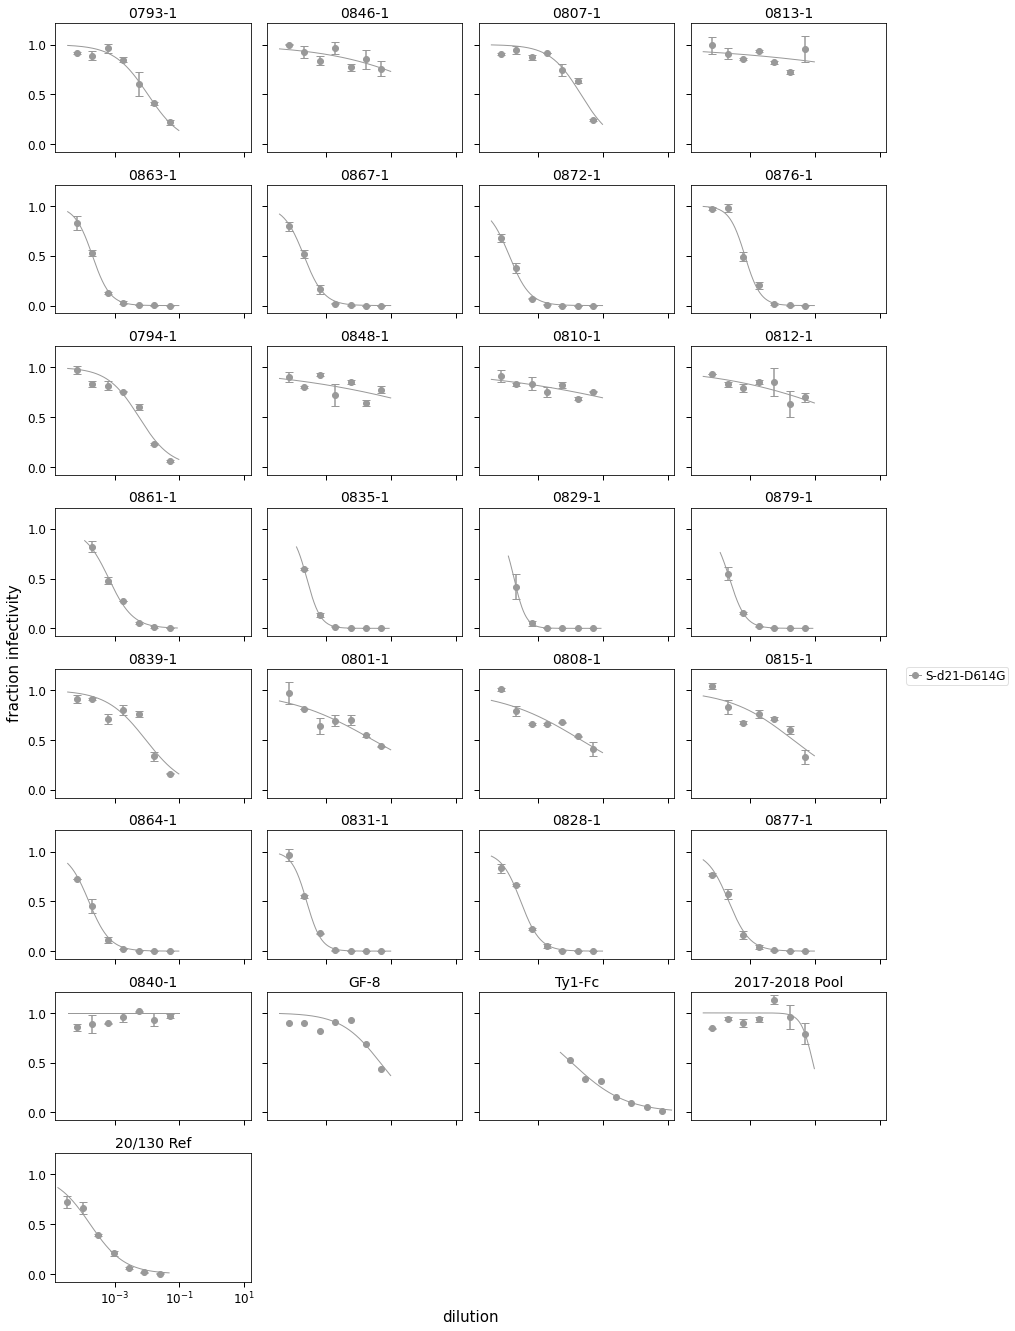

In [26]:
fig, axes = fits_rnd1.plotSera(xlabel='dilution')

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.


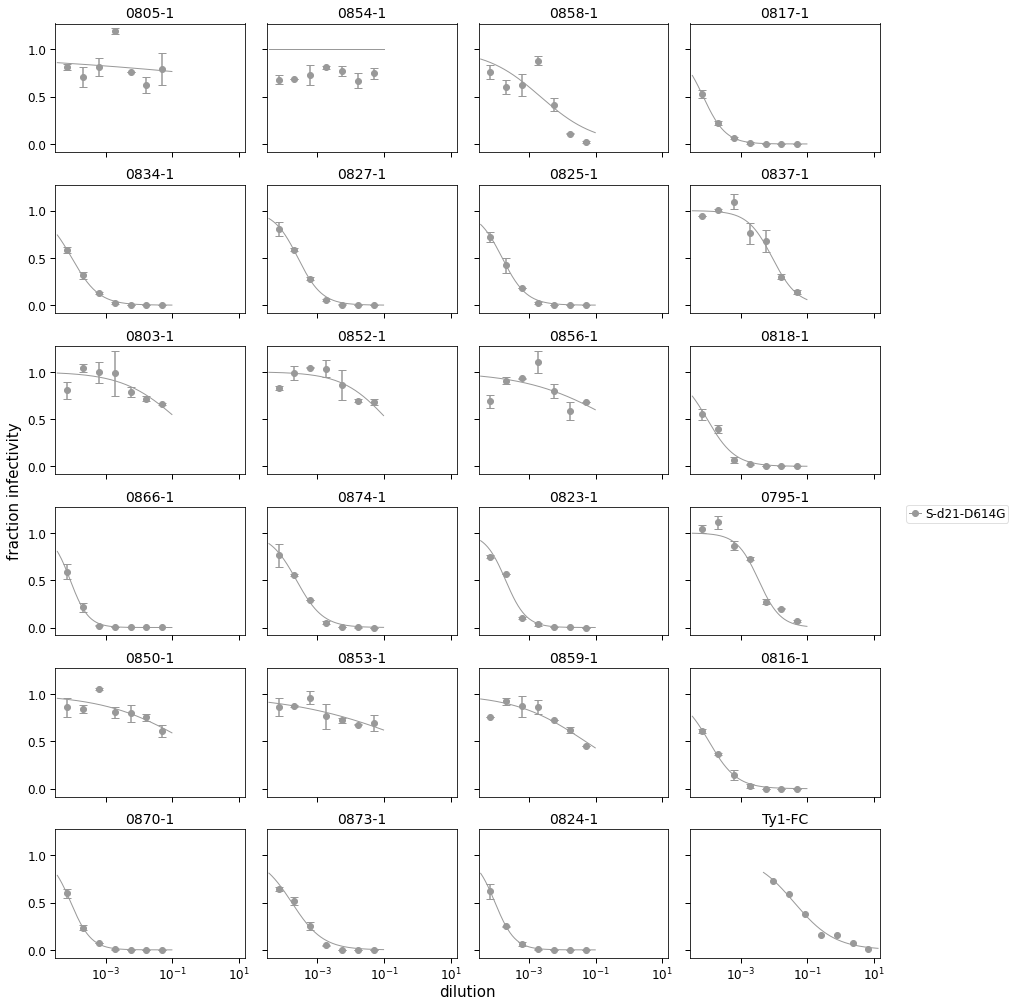

In [27]:
fig, axes = fits_rnd2_nosp.plotSera(xlabel='dilution')

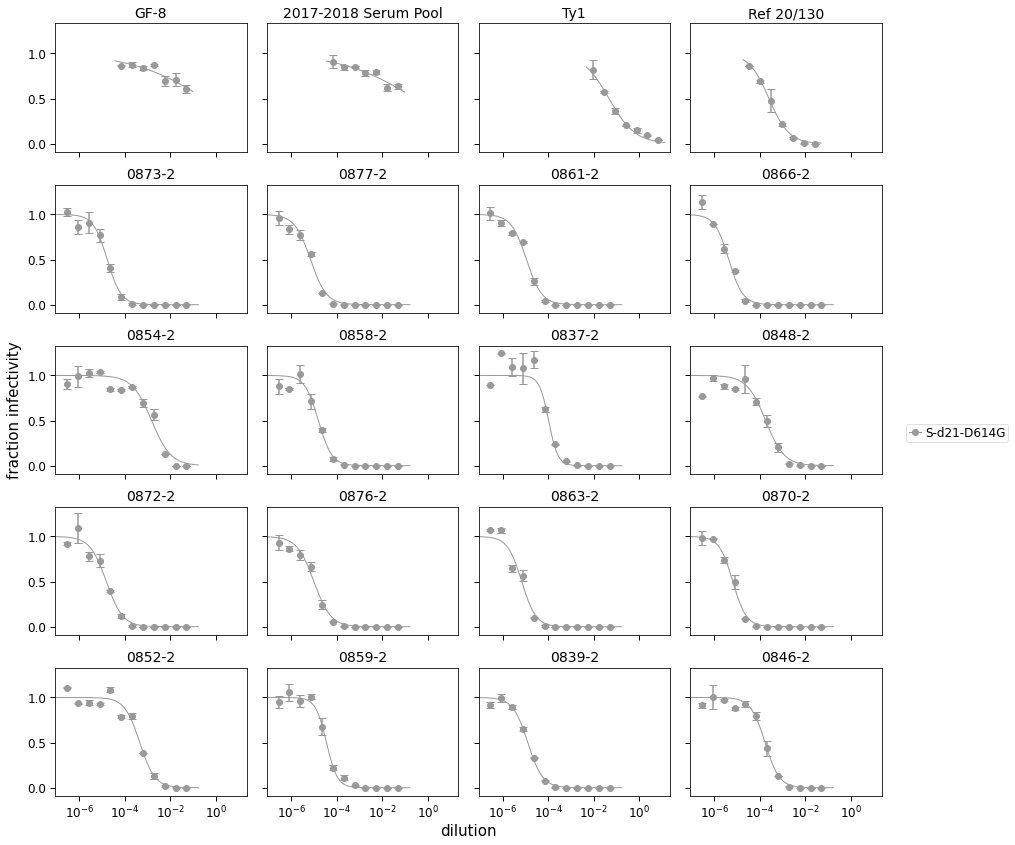

In [28]:
fig, axes = fits_rnd3.plotSera(xlabel='dilution')

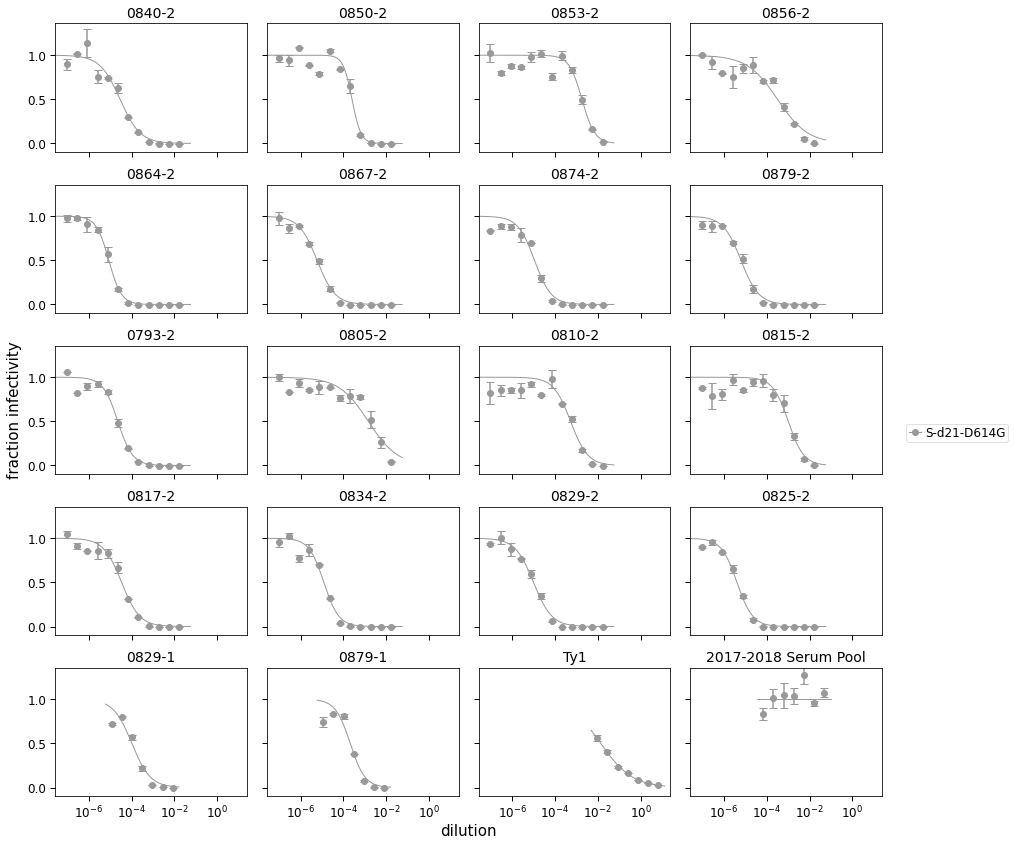

In [29]:
fig, axes = fits_rnd4.plotSera(xlabel='dilution')

The IC50 is 0.0108


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.


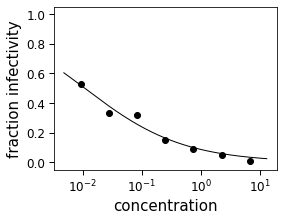

In [30]:
curve = fits_rnd1.getCurve(serum='Ty1-Fc', virus='S-d21-D614G', replicate='1')
print(f"The IC50 is {curve.ic50():.3g}")
fig, ax = curve.plot()

The IC50 is 0.0405


/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.


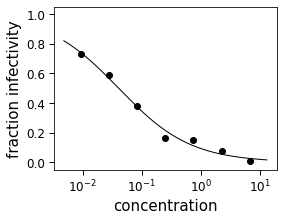

In [31]:
curve = fits_rnd2.getCurve(serum='Ty1-FC', virus='S-d21-D614G', replicate='1')
print(f"The IC50 is {curve.ic50():.3g}")
fig, ax = curve.plot()

The IC50 is 0.0463


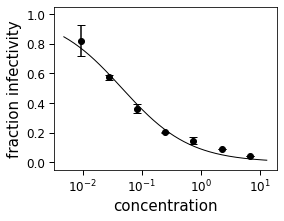

In [32]:
curve = fits_rnd3.getCurve(serum='Ty1', virus='S-d21-D614G', replicate='average')
print(f"The IC50 is {curve.ic50():.3g}")
fig, ax = curve.plot()

The IC50 is 0.0137


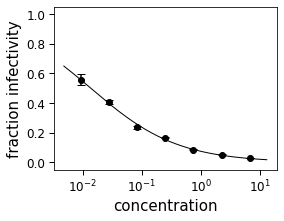

In [33]:
curve = fits_rnd4.getCurve(serum='Ty1', virus='S-d21-D614G', replicate='average')
print(f"The IC50 is {curve.ic50():.3g}")
fig, ax = curve.plot()

The IC50 is 5.73e+03


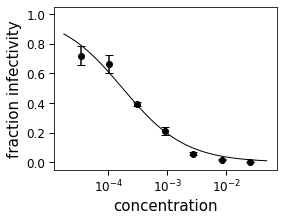

In [34]:
curve = fits_rnd1.getCurve(serum='20/130 Ref', virus='S-d21-D614G', replicate='average')
print(f"The IC50 is {1/curve.ic50():.3g}")
fig, ax = curve.plot()

The IC50 is 4.02e+03


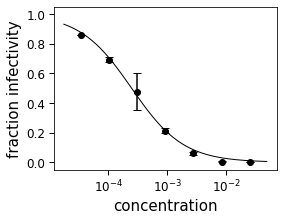

In [35]:
curve = fits_rnd3.getCurve(serum='Ref 20/130', virus='S-d21-D614G', replicate='average')
print(f"The IC50 is {1/curve.ic50():.3g}")
fig, ax = curve.plot()

### Output csv with relevant data

Output columns: `serum`, `ic50`, `ic90`, `nt50`, `nt90`, `DateSetUp`, `Plate`, `SampleNum`

In [46]:
all_data_df = pd.concat([df_fits_rnd1, df_fits_rnd2, df_fits_rnd3, df_fits_rnd4])

export_df = all_data_df[['serum', 'ic50', 'ic90', 'nt50', 'nt90', 'DateSetUp', 'Plate', 'SampleNum']]

display(export_df)

export_df.to_csv('./interim_results.csv')

,serum,ic50,ic90,nt50,nt90,DateSetUp,Plate,SampleNum
0,0793-1,0.010629,0.050000,94.080392,20.000000,201013,Plate1,1
1,0846-1,0.050000,0.050000,20.000000,20.000000,201013,Plate1,2
2,0807-1,0.020702,0.050000,48.303432,20.000000,201013,Plate1,3
3,0813-1,0.050000,0.050000,20.000000,20.000000,201013,Plate1,4
4,0863-1,0.000207,0.000825,4834.077623,1211.892515,201013,Plate2,1
...,...,...,...,...,...,...,...,...
15,0825-2,0.000004,0.000026,246436.732120,38538.232303,201018,Plate8,2
16,0829-1,0.000102,0.000911,9825.283272,1097.610216,201018,Plate9,1
17,0879-1,0.000209,0.001205,4781.892567,830.200291,201018,Plate9,2
18,Ty1,0.013672,0.573187,73.139932,1.744632,201018,Plate9,3


In [48]:
display(export_df[export_df['serum'] == 'GF-8'])

,serum,ic50,ic90,nt50,nt90,DateSetUp,Plate,SampleNum
25,GF-8,0.046063,0.05,21.709542,20.0,201013,Plate7,2
0,GF-8,0.050000,0.05,20.000000,20.0,201015,Plate9,1


## Initial Analyses

Still need to drop earlier points from samples I re-ran.

In [37]:
drop_samples = ['GF-8', 'Ref 20/130', '2017-2018 Serum Pool', '2017-2018 Pool', '20/130 Ref', '2017-2018 serum pool', 'Ty1', 'Ty1-FC', 'Ty1-Fc']
all_data_df = all_data_df[~all_data_df['serum'].isin(drop_samples)].copy()
all_data_df['Timepoint'] = all_data_df['serum'].apply(lambda x: 'Prime' if '-1' in x else 'Boost')
all_data_df['Mouse'] = all_data_df['serum'].apply(lambda x: x[:-2])

In [38]:
display(all_data_df.sort_values('Mouse').reset_index(drop=True).head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,slope,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum,Timepoint,Mouse
0,0793-1,S-d21-D614G,average,2,0.010629,interpolated,0.0106,0.050000,lower,>0.05,...,0.831619,True,0.0,94.080392,20.000000,201013,Plate1,1,Prime,0793
1,0793-2,S-d21-D614G,average,2,0.000022,interpolated,2.24e-05,0.000128,interpolated,0.000128,...,1.259974,True,0.0,44675.547272,7811.216903,201018,Plate5,1,Boost,0793
2,0794-1,S-d21-D614G,average,2,0.005679,interpolated,0.00568,0.050000,lower,>0.05,...,0.883053,True,0.0,176.078510,20.000000,201013,Plate3,1,Prime,0794
3,0795-1,S-d21-D614G,average,2,0.003452,interpolated,0.00345,0.018323,interpolated,0.0183,...,1.316237,True,0.0,289.722489,54.576362,201014,Plate4,4,Prime,0795
4,0801-1,S-d21-D614G,average,2,0.027208,interpolated,0.0272,0.050000,lower,>0.05,...,0.316651,True,0.0,36.753264,20.000000,201013,Plate5,2,Prime,0801


In [39]:
groups = {'Group 8': ['0840', '0837', '0839', '0794', '0795', '0793'], 
          'Group 9': ['0801', '0803', '0805', '0850', '0848', '0846'],
          'Group 10': ['0808', '0807', '0810', '0853', '0854', '0852'],
          'Group 11': ['0813', '0812', '0815', '0856', '0858', '0859'],
          'Group 12': ['0816', '0818', '0817', '0864', '0861', '0863'],
          'Group 13': ['0835', '0831', '0834', '0867', '0866', '0870'],
          'Group 14': ['0827', '0828', '0829', '0874', '0873', '0872'],
          'Group 15': ['0823', '0824', '0825', '0879', '0877', '0876']}

In [40]:
all_data_df["Group"] = all_data_df["Mouse"].apply(lambda x: [group for group in groups.keys() if x in groups[group]][0])

In [41]:
display(all_data_df.head())

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,top,bottom,nt50,nt90,DateSetUp,Plate,SampleNum,Timepoint,Mouse,Group
0,0793-1,S-d21-D614G,average,2,0.010629,interpolated,0.0106,0.050000,lower,>0.05,...,True,0.0,94.080392,20.000000,201013,Plate1,1,Prime,0793,Group 8
1,0846-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,...,True,0.0,20.000000,20.000000,201013,Plate1,2,Prime,0846,Group 9
2,0807-1,S-d21-D614G,average,2,0.020702,interpolated,0.0207,0.050000,lower,>0.05,...,True,0.0,48.303432,20.000000,201013,Plate1,3,Prime,0807,Group 10
3,0813-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,...,True,0.0,20.000000,20.000000,201013,Plate1,4,Prime,0813,Group 11
4,0863-1,S-d21-D614G,average,2,0.000207,interpolated,0.000207,0.000825,interpolated,0.000825,...,True,0.0,4834.077623,1211.892515,201013,Plate2,1,Prime,0863,Group 12


In [42]:
group_list = ['Group 8', 'Group 9', 'Group 10', 'Group 11', 'Group 12',
              'Group 13', 'Group 14', 'Group 15']
group_cat = pd.Categorical(all_data_df['Group'], categories=group_list)

# assign to a new column in the DataFrame
all_data_df = all_data_df.assign(group_order = group_cat)

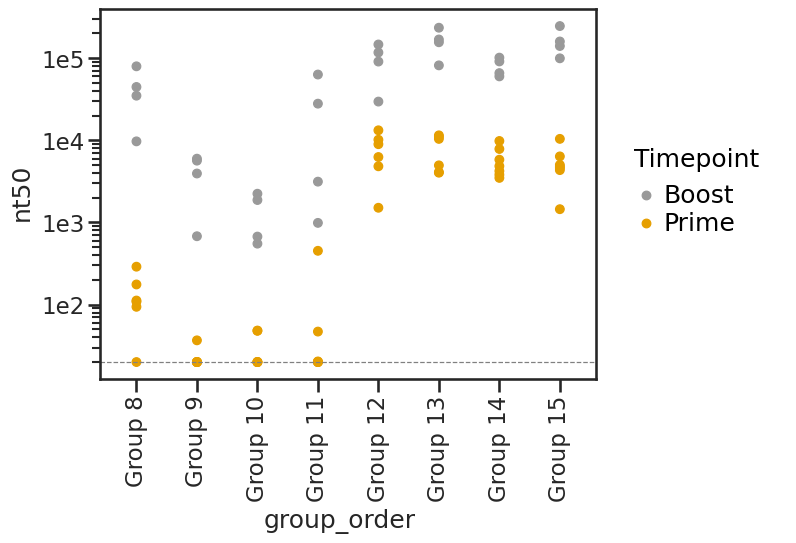

In [43]:
ic50s_plot = (ggplot(all_data_df, aes('group_order', 'nt50', color='Timepoint')) +
              geom_point(size=3) +
              scale_color_manual(values=CBP) +
              theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5)) +
              geom_hline(yintercept=20, color='grey', linetype='dashed') +
              scale_x_discrete(breaks=['Group 8', 'Group 9', 'Group 10', 'Group 11', 'Group 12',
                                       'Group 13', 'Group 14', 'Group 15']) +
              scale_y_continuous(trans='log10'))

_ = ic50s_plot.draw()

In [44]:
display(all_data_df[all_data_df['Group'] == 'Group 11'])

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,bottom,nt50,nt90,DateSetUp,Plate,SampleNum,Timepoint,Mouse,Group,group_order
3,0813-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,...,0.0,20.000000,20.000000,201013,Plate1,4,Prime,0813,Group 11,Group 11
11,0812-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,...,0.0,20.000000,20.000000,201013,Plate3,4,Prime,0812,Group 11,Group 11
19,0815-1,S-d21-D614G,average,2,0.021280,interpolated,0.0213,0.050000,lower,>0.05,...,0.0,46.992898,20.000000,201013,Plate5,4,Prime,0815,Group 11,Group 11
2,0858-1,S-d21-D614G,average,2,0.002211,interpolated,0.00221,0.050000,lower,>0.05,...,0.0,452.261297,20.000000,201014,Plate1,3,Prime,0858,Group 11,Group 11
10,0856-1,S-d21-D614G,average,2,0.050000,lower,>0.05,0.050000,lower,>0.05,...,0.0,20.000000,20.000000,201014,Plate3,3,Prime,0856,Group 11,Group 11
18,0859-1,S-d21-D614G,average,2,0.049150,interpolated,0.0491,0.050000,lower,>0.05,...,0.0,20.346071,20.000000,201014,Plate5,3,Prime,0859,Group 11,Group 11
9,0858-2,S-d21-D614G,average,2,0.000016,interpolated,1.58e-05,0.000071,interpolated,7.1e-05,...,0.0,63305.285237,14083.702601,201015,Plate6,2,Boost,0858,Group 11,Group 11
17,0859-2,S-d21-D614G,average,2,0.000036,interpolated,3.57e-05,0.000120,interpolated,0.00012,...,0.0,27979.683050,8321.554919,201015,Plate2,2,Boost,0859,Group 11,Group 11
3,0856-2,S-d21-D614G,average,2,0.000318,interpolated,0.000318,0.011380,interpolated,0.0114,...,0.0,3143.337332,87.875780,201018,Plate2,2,Boost,0856,Group 11,Group 11
11,0815-2,S-d21-D614G,average,2,0.001011,interpolated,0.00101,0.006351,interpolated,0.00635,...,0.0,989.452239,157.451614,201018,Plate6,2,Boost,0815,Group 11,Group 11
